In [1]:
import pandas as pd
import numpy as np
import zipfile
import os
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use("ggplot")

In [2]:
# settings
data_root = '/home/jma/Python3.7/Cubist_2021_11'

In [3]:
with zipfile.ZipFile(os.path.join(data_root, 'security_reference_data_w_ret1d.zip')) as zf:
    df = pd.read_csv(zf.open('security_reference_data_w_ret1d.csv'))

In [4]:
df['data_date'] = df['data_date'].apply(lambda x: pd.Timestamp(str(x)[:4] + '-' + str(x)[4:6] + '-' + str(x)[6:8]))
df['security_id'] = df['security_id'].astype(str)

In [5]:
numericcols = ['close_price', 'volume', 'group_id', 'ret1d']
df[numericcols] = df[numericcols].apply(lambda x: pd.to_numeric(x, errors='coerce'))

In [6]:
print(df.isnull().sum())
print(df.tail())

assert not df.duplicated(subset=['data_date', 'security_id']).any()
print(df.loc[df['ret1d'].isnull(), 'data_date'].value_counts().head())

data_date                 0
security_id               0
close_price               0
volume                    0
group_id                  0
in_trading_universe       0
ret1d                  8854
dtype: int64
         data_date security_id  close_price    volume  group_id  \
8800010 2017-12-29  1117990501        21.47   93476.0  35203010   
8800011 2017-12-29  1117990901        17.76  221820.0  45201020   
8800012 2017-12-29  1117992101        15.90  310431.0  60102040   
8800013 2017-12-29  1117995601        25.00    9102.0  35202010   
8800014 2017-12-29  1118042001        13.90  581837.0  40202010   

        in_trading_universe     ret1d  
8800010                   N -0.032011  
8800011                   N  0.128335  
8800012                   N  0.026469  
8800013                   N  0.002004  
8800014                   N  0.100554  
2014-07-31    17
2015-06-25    17
2014-09-24    17
2014-01-31    16
2013-09-27    16
Name: data_date, dtype: int64


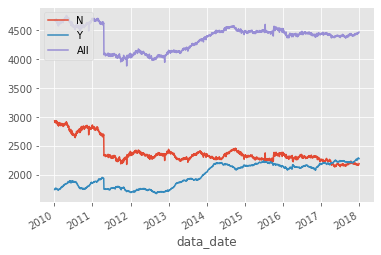

In [7]:
df.groupby(['data_date', 'in_trading_universe']).size().unstack(level=1).plot()
df.groupby(['data_date']).size().plot()
plt.legend(['N', 'Y', 'All'], loc='upper left')

In [8]:
print(df.dtypes)

data_date              datetime64[ns]
security_id                    object
close_price                   float64
volume                        float64
group_id                        int64
in_trading_universe            object
ret1d                         float64
dtype: object


In [9]:
df['sector_id'] = (df['group_id'] / 1e6).astype(int)
df['industry_id'] = (df['group_id'] / 1e2).astype(int)

In [10]:
df.tail()

data_date security_id  close_price    volume  group_id  \
8800010 2017-12-29  1117990501        21.47   93476.0  35203010   
8800011 2017-12-29  1117990901        17.76  221820.0  45201020   
8800012 2017-12-29  1117992101        15.90  310431.0  60102040   
8800013 2017-12-29  1117995601        25.00    9102.0  35202010   
8800014 2017-12-29  1118042001        13.90  581837.0  40202010   

        in_trading_universe     ret1d  sector_id  industry_id  
8800010                   N -0.032011         35       352030  
8800011                   N  0.128335         45       452010  
8800012                   N  0.026469         60       601020  
8800013                   N  0.002004         35       352020  
8800014                   N  0.100554         40       402020

In [11]:
sector_gics_mapping = dict({10: 'Energy', 15: 'Materials', 20: 'Industrials', 25: 'Consumer Discretionary', 
                            30: 'Consumer Staples', 35: 'Health Care', 40: 'Financials', 
                            45: 'Information Technology', 50: 'Communication Services', 55: 'Utilities',
                            60: 'Real Estate'})

industry_gics_mapping = dict({}) ## Not implemented yet

In [12]:
df['sector'] = df['sector_id'].map(sector_gics_mapping)

In [13]:
df.head()

data_date security_id  close_price     volume  group_id  \
0 2010-01-04       77901        19.99    72728.0  20102010   
1 2010-01-04       78001        23.77   460537.0  20101010   
2 2010-01-04       78401        19.64  1847102.0  20104020   
3 2010-01-04       82901         2.80   219545.0  20301010   
4 2010-01-04       83501         7.90   389291.0  20201060   

  in_trading_universe     ret1d  sector_id  industry_id       sector  
0                   N  0.025654         20       201020  Industrials  
1                   Y  0.034378         20       201010  Industrials  
2                   Y  0.028272         20       201040  Industrials  
3                   N  0.060606         20       203010  Industrials  
4                   N  0.085165         20       202010  Industrials

<AxesSubplot:xlabel='data_date'>

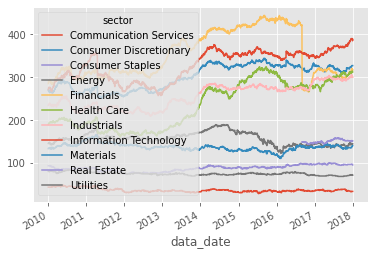

In [14]:
df.loc[df['in_trading_universe'] == 'Y'].groupby(['data_date', 'sector']).size().unstack(level=1).plot()

In [15]:
alldts = df['data_date'].unique()
allsyms = df.loc[df['in_trading_universe'] == 'Y', 'security_id'].unique()
print(len(alldts), len(allsyms))

2013 3982


In [16]:
all_univ_data = pd.merge(pd.DataFrame({'data_date': alldts, 'inUniv': 1}),
                         pd.DataFrame({'security_id': allsyms, 'inUniv': 1}), on='inUniv')

In [17]:
all_univ_data.groupby("data_date").size().unique()
# want to see everyday has valid value

array([3982])

In [ ]:
all_univ_data = all_univ_data.merge(df[['data_date', 'security_id', 'close_price', 'volume', 'in_trading_universe',
                                       'ret1d', 'sector']], on=['data_date', 'security_id'], how='left')
print(all_univ_data.head())

In [ ]:
all_univ_data.groupby("data_date").size().plot()

In [ ]:
all_univ_data.isnull().sum()